# Actividad de Aprendizaje 6 - Taller 4: Regresión Lineal

**Asignatura:** Técnicas de Análisis Estadístico  
**Estudiante(s):**
**Código(s):** [Cindy Liliana Vargas Duque | Luis Angel Vargas Narvaez | Jesus Ariel Gonzalez Bonilla]  
**Fecha:** Julio 2025  
**Profesor:** Jose Miguel Llanos Mosquera

---

## Objetivo General

Aplicar técnicas de **regresión lineal** para analizar la relación funcional entre variables explicativas y una variable de respuesta utilizando el dataset de hábitos estudiantiles y rendimiento académico.

## Objetivos Específicos

1. Realizar análisis exploratorio de datos para identificar variables candidatas
2. Implementar modelos de regresión lineal simple y múltiple
3. Evaluar la calidad del ajuste de los modelos
4. Interpretar los coeficientes y resultados estadísticos
5. Validar los supuestos de la regresión lineal

---

## 1. Importación de Librerías

In [1]:
# Importar librerías básicas para manipulación de datos
import pandas as pd
import numpy as np

# Importar librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Importar librerías para regresión lineal y métricas
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 2. Carga y Exploración Inicial de Datos

In [3]:
# Cargar el dataset
df = pd.read_csv('enhanced_student_habits_performance_dataset.csv')

print(f"Dataset cargado exitosamente:")
print(f"   - Forma: {df.shape}")
print(f"   - Filas: {df.shape[0]:,} estudiantes")
print(f"   - Columnas: {df.shape[1]} variables")

# Mostrar las primeras filas
print("\nPrimeras 5 filas del dataset:")
display(df.head())

Dataset cargado exitosamente:
   - Forma: (80000, 1)
   - Filas: 80,000 estudiantes
   - Columnas: 1 variables

Primeras 5 filas del dataset:


,student_id;age;gender;major;study_hours_per_day;social_media_hours;netflix_hours;part_time_job;attendance_percentage;sleep_hours;diet_quality;exercise_frequency;parental_education_level;internet_quality;mental_health_rating;extracurricular_participation;previous_gpa;semester;stress_level;dropout_risk;social_activity;screen_time;study_environment;access_to_tutoring;family_income_range;parental_support_level;motivation_level;exam_anxiety_score;learning_style;time_management_score;exam_score
0,100000;26;Male;Computer Science;764.536.653.37...
1,100001;28;Male;Arts;5.7;0.5;0.4;No;88.4;7.2;Go...
2,100002;17;Male;Arts;2.4;4.2;0.7;No;82.1;9.2;Go...
3,100003;27;Other;Psychology;3.4;4.6;2.3;Yes;79....
4,100004;25;Female;Business;4.7;0.8;2.7;Yes;62.9...


In [4]:
# Estadísticas descriptivas de variables numéricas
print("Estadísticas descriptivas:")
display(df.describe())

Estadísticas descriptivas:


,student_id;age;gender;major;study_hours_per_day;social_media_hours;netflix_hours;part_time_job;attendance_percentage;sleep_hours;diet_quality;exercise_frequency;parental_education_level;internet_quality;mental_health_rating;extracurricular_participation;previous_gpa;semester;stress_level;dropout_risk;social_activity;screen_time;study_environment;access_to_tutoring;family_income_range;parental_support_level;motivation_level;exam_anxiety_score;learning_style;time_management_score;exam_score
count,80000
unique,80000
top,100000;26;Male;Computer Science;764.536.653.37...
freq,1


##  3. Identificación de Variables

 **Instrucción:** Identifica la variable dependiente (variable de respuesta) y las variables independientes (variables explicativas) candidatas para el análisis de regresión

In [5]:
#  Definir la variable dependiente (variable de respuesta)
variable_dependiente = 'exam_score'

#  Identificar variables numéricas candidatas para regresión
variables_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
print(f" Variables numéricas disponibles: {variables_numericas}")

#  Remover la variable dependiente de las candidatas a explicativas
variables_candidatas = [col for col in variables_numericas if col != variable_dependiente and col != 'student_id']
print(f"\n Variables candidatas a explicativas: {variables_candidatas}")

print(f"\n Variable dependiente: {variable_dependiente}")

 Variables numéricas disponibles: []

 Variables candidatas a explicativas: []

 Variable dependiente: exam_score


##  4. Análisis Exploratorio de Datos (EDA)

 **Instrucción:** Realiza un análisis exploratorio para entender las relaciones entre variables y identificar las mejores candidatas para la regresión

KeyError: 'exam_score'

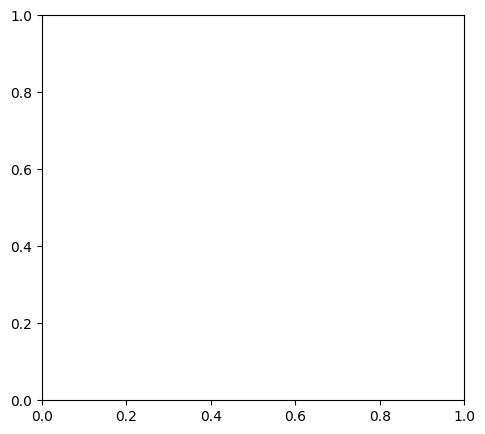

In [6]:
#  Distribución de la variable dependiente
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df[variable_dependiente], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title(f'Distribución de {variable_dependiente}')
plt.xlabel(variable_dependiente)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.boxplot(df[variable_dependiente])
plt.title(f'Boxplot de {variable_dependiente}')
plt.ylabel(variable_dependiente)

plt.tight_layout()
plt.show()

#  Estadísticas de la variable dependiente
print(f" Estadísticas de {variable_dependiente}:")
print(df[variable_dependiente].describe())

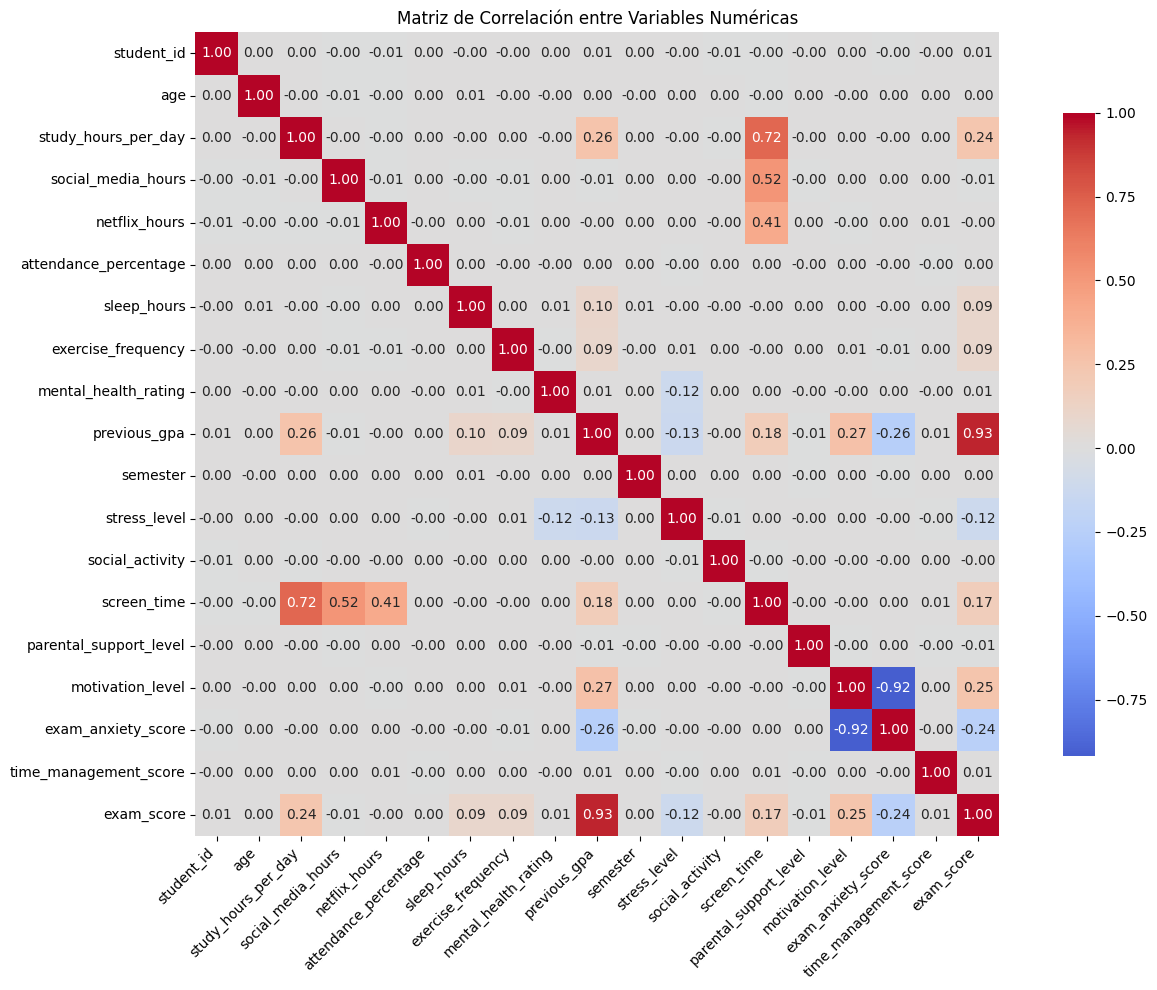

In [ ]:
#  Matriz de correlación entre variables numéricas
plt.figure(figsize=(14, 10))
correlation_matrix = df[variables_numericas].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#  Identificar las variables más correlacionadas con la variable dependiente
correlaciones = df[variables_numericas].corr()[variable_dependiente].abs().sort_values(ascending=False)
print(" Correlaciones con la variable dependiente (valores absolutos):")
print(correlaciones)

#  Seleccionar las top 5 variables más correlacionadas (excluyendo la variable dependiente)
top_variables = correlaciones.drop(variable_dependiente).head(5).index.tolist()
print(f"\n Top 5 variables más correlacionadas: {top_variables}")

 Correlaciones con la variable dependiente (valores absolutos):
exam_score                1.000000
previous_gpa              0.932940
motivation_level          0.250287
study_hours_per_day       0.241460
exam_anxiety_score        0.235909
screen_time               0.169788
stress_level              0.118550
sleep_hours               0.090820
exercise_frequency        0.086983
mental_health_rating      0.010556
student_id                0.007557
social_media_hours        0.006351
parental_support_level    0.006333
time_management_score     0.005940
attendance_percentage     0.002876
social_activity           0.002795
netflix_hours             0.001271
semester                  0.000541
age                       0.000487
Name: exam_score, dtype: float64

 Top 5 variables más correlacionadas: ['previous_gpa', 'motivation_level', 'study_hours_per_day', 'exam_anxiety_score', 'screen_time']


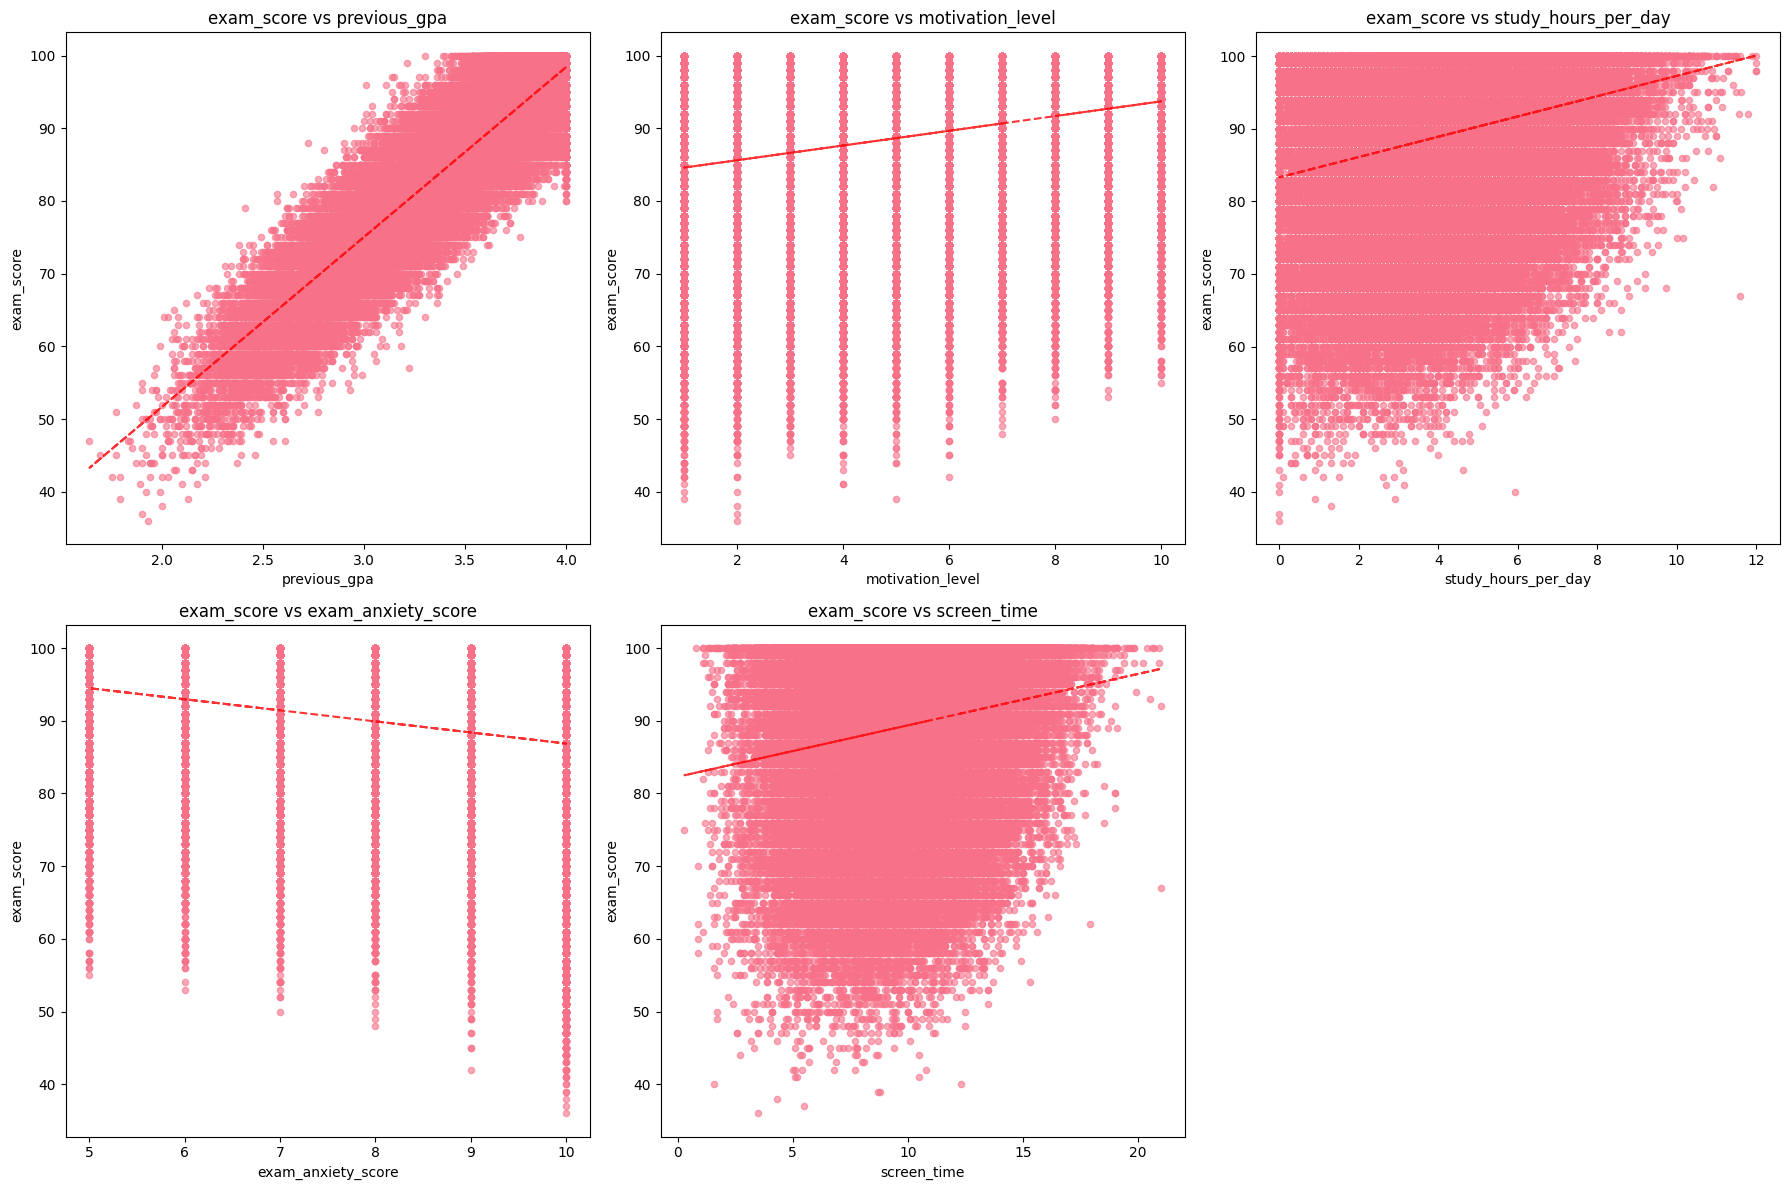

In [ ]:
#  Gráficos de dispersión para las variables más correlacionadas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(top_variables[:5]):
    axes[i].scatter(df[var], df[variable_dependiente], alpha=0.6, s=20)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(variable_dependiente)
    axes[i].set_title(f'{variable_dependiente} vs {var}')

    #  Agregar línea de tendencia
    z = np.polyfit(df[var], df[variable_dependiente], 1)
    p = np.poly1d(z)
    axes[i].plot(df[var], p(df[var]), "r--", alpha=0.8)

# Remover el subplot extra si hay menos de 6 variables
if len(top_variables) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

##  5. Regresión Lineal Simple

 **Instrucción:** Implementa modelos de regresión lineal simple usando la variable más correlacionada con exam_score

In [ ]:
#  Seleccionar la variable más correlacionada para regresión simple
variable_explicativa_principal = top_variables[0]
print(f" Variable seleccionada para regresión simple: {variable_explicativa_principal}")

#  Preparar los datos
X_simple = df[[variable_explicativa_principal]].values
y = df[variable_dependiente].values

print(f" Datos preparados:")
print(f"   - Variable independiente: {variable_explicativa_principal}")
print(f"   - Variable dependiente: {variable_dependiente}")
print(f"   - Número de observaciones: {len(X_simple)}")

 Variable seleccionada para regresión simple: previous_gpa
 Datos preparados:
   - Variable independiente: previous_gpa
   - Variable dependiente: exam_score
   - Número de observaciones: 80000


In [ ]:
#  Dividir los datos en entrenamiento y prueba PARA MODELO SIMPLE
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

print(f" División de datos para modelo simple:")
print(f"   - Entrenamiento: {len(X_train_simple)} observaciones")
print(f"   - Prueba: {len(X_test_simple)} observaciones")

 División de datos para modelo simple:
   - Entrenamiento: 64000 observaciones
   - Prueba: 16000 observaciones


In [ ]:
#  Crear y entrenar el modelo de regresión lineal simple
modelo_simple = LinearRegression()
modelo_simple.fit(X_train_simple, y_train_simple)

#  Realizar predicciones
y_pred_train_simple = modelo_simple.predict(X_train_simple)
y_pred_test_simple = modelo_simple.predict(X_test_simple)

print(" Modelo de regresión lineal simple entrenado")

 Modelo de regresión lineal simple entrenado


In [ ]:
#  Evaluar el modelo de regresión simple
r2_train_simple = r2_score(y_train_simple, y_pred_train_simple)
r2_test_simple = r2_score(y_test_simple, y_pred_test_simple)
mse_test_simple = mean_squared_error(y_test_simple, y_pred_test_simple)
rmse_test_simple = np.sqrt(mse_test_simple)
mae_test_simple = mean_absolute_error(y_test_simple, y_pred_test_simple)

print(" RESULTADOS DEL MODELO DE REGRESIÓN LINEAL SIMPLE:")
print("="*60)
print(f"Variable explicativa: {variable_explicativa_principal}")
print(f"Variable dependiente: {variable_dependiente}")
print("")
print(f" Coeficientes del modelo:")
print(f"   - Intersección (β₀): {modelo_simple.intercept_:.4f}")
print(f"   - Pendiente (β₁): {modelo_simple.coef_[0]:.4f}")
print("")
print(f" Métricas de evaluación:")
print(f"   - R² (entrenamiento): {r2_train_simple:.4f}")
print(f"   - R² (prueba): {r2_test_simple:.4f}")
print(f"   - MSE (prueba): {mse_test_simple:.4f}")
print(f"   - RMSE (prueba): {rmse_test_simple:.4f}")
print(f"   - MAE (prueba): {mae_test_simple:.4f}")
print("="*60)

 RESULTADOS DEL MODELO DE REGRESIÓN LINEAL SIMPLE:
Variable explicativa: previous_gpa
Variable dependiente: exam_score

 Coeficientes del modelo:
   - Intersección (β₀): 5.0307
   - Pendiente (β₁): 23.3484

 Métricas de evaluación:
   - R² (entrenamiento): 0.8703
   - R² (prueba): 0.8705
   - MSE (prueba): 17.5357
   - RMSE (prueba): 4.1876
   - MAE (prueba): 3.1956


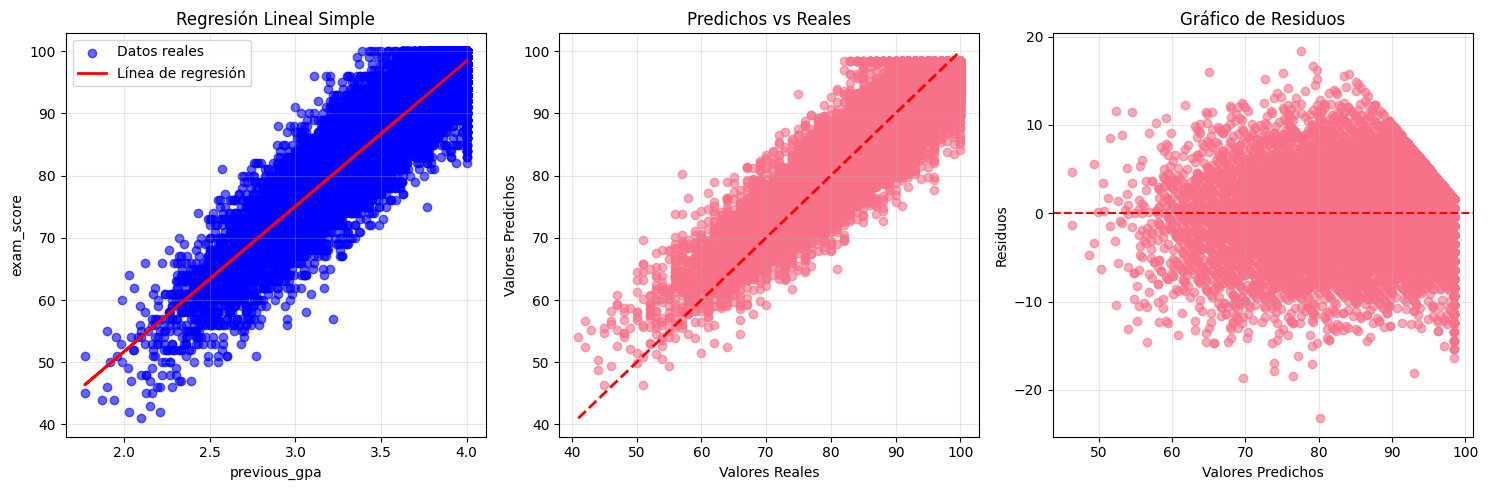

In [ ]:
#  Visualización del modelo de regresión simple
plt.figure(figsize=(15, 5))

# Gráfico 1: Datos y línea de regresión
plt.subplot(1, 3, 1)
plt.scatter(X_test_simple, y_test_simple, alpha=0.6, color='blue', label='Datos reales')
plt.plot(X_test_simple, y_pred_test_simple, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel(variable_explicativa_principal)
plt.ylabel(variable_dependiente)
plt.title('Regresión Lineal Simple')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Valores predichos vs reales
plt.subplot(1, 3, 2)
plt.scatter(y_test_simple, y_pred_test_simple, alpha=0.6)
plt.plot([y_test_simple.min(), y_test_simple.max()], [y_test_simple.min(), y_test_simple.max()], 'r--', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Predichos vs Reales')
plt.grid(True, alpha=0.3)

# Gráfico 3: Residuos
plt.subplot(1, 3, 3)
residuos_simple = y_test_simple - y_pred_test_simple
plt.scatter(y_pred_test_simple, residuos_simple, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

###  Interpretación del Modelo de Regresión Lineal Simple

 **Instrucción:** Completa la siguiente interpretación basándote en los resultados obtenidos:

In [ ]:
# Interpretación dinámica de resultados - Regresión simple

print("="*70)
print("Interpretación de resultados - Regresión lineal simple")
print("="*70)

print("\n1. Ecuación del modelo:")
print(f"   {variable_dependiente} = {modelo_simple.intercept_:.4f} + {modelo_simple.coef_[0]:.4f} × {variable_explicativa_principal}")
print(f"   Ecuación específica: exam_score = {modelo_simple.intercept_:.4f} + {modelo_simple.coef_[0]:.4f} × {variable_explicativa_principal}")

print("\n2. Interpretación de coeficientes:")
print(f"   • Intersección (β₀ = {modelo_simple.intercept_:.4f}):")
if modelo_simple.intercept_ >= 0:
    print(f"     - Cuando {variable_explicativa_principal} = 0, el exam_score esperado es {modelo_simple.intercept_:.2f} puntos")
else:
    print(f"     - Cuando {variable_explicativa_principal} = 0, el exam_score esperado sería {modelo_simple.intercept_:.2f} puntos")
    print("     - (Nota: Este valor puede no ser realista si 0 está fuera del rango de datos)")

print(f"   • Pendiente (β₁ = {modelo_simple.coef_[0]:.4f}):")
if modelo_simple.coef_[0] > 0:
    print(f"     - Por cada unidad de incremento en {variable_explicativa_principal}, ")
    print(f"       el exam_score aumenta en promedio {modelo_simple.coef_[0]:.4f} puntos")
    print("     - Relación positiva: a mayor valor de la variable explicativa, mayor exam_score")
else:
    print(f"     - Por cada unidad de incremento en {variable_explicativa_principal}, ")
    print(f"       el exam_score disminuye en promedio {abs(modelo_simple.coef_[0]):.4f} puntos")
    print("     - Relación negativa: a mayor valor de la variable explicativa, menor exam_score")

print("\n3. Calidad del ajuste:")
print(f"   • R² = {r2_test_simple:.4f} ({r2_test_simple*100:.2f}%)")
print(f"     - El modelo explica {r2_test_simple*100:.2f}% de la variabilidad en exam_score")
if r2_test_simple >= 0.7:
    print("     - Excelente poder explicativo")
elif r2_test_simple >= 0.5:
    print("     - Buen poder explicativo")
elif r2_test_simple >= 0.3:
    print("     - Moderado poder explicativo")
else:
    print("     - Bajo poder explicativo")

print(f"   • RMSE = {rmse_test_simple:.4f}")
print(f"     - Error promedio de predicción: ±{rmse_test_simple:.2f} puntos en exam_score")
print(f"     - En promedio, nuestras predicciones se desvían {rmse_test_simple:.2f} puntos del valor real")

print(f"   • MAE = {mae_test_simple:.4f}")
print(f"     - Error absoluto medio: {mae_test_simple:.2f} puntos")

print("\n4. Análisis de correlación:")
correlacion_principal = correlaciones[variable_explicativa_principal]
print(f"   • Correlación con {variable_explicativa_principal}: {correlacion_principal:.4f}")
if abs(correlacion_principal) >= 0.7:
    print("     - Correlación fuerte")
elif abs(correlacion_principal) >= 0.5:
    print("     - Correlación moderada")
elif abs(correlacion_principal) >= 0.3:
    print("     - Correlación débil")
else:
    print("     - Correlación muy débil")

print("\n5. Conclusiones específicas:")
print(f"   • {variable_explicativa_principal} es la variable más correlacionada con exam_score")
print(f"   • El modelo simple puede predecir exam_score con un R² de {r2_test_simple:.3f}")
if r2_test_simple >= 0.5:
    print("   • El modelo es útil para predicción y comprensión de la relación")
else:
    print("   • El modelo tiene limitaciones para predicción precisa")
    print("   • Se recomienda considerar variables adicionales (modelo múltiple)")

print("="*70)

Interpretación de resultados - Regresión lineal simple

1. Ecuación del modelo:
   exam_score = 5.0307 + 23.3484 × previous_gpa
   Ecuación específica: exam_score = 5.0307 + 23.3484 × previous_gpa

2. Interpretación de coeficientes:
   • Intersección (β₀ = 5.0307):
     - Cuando previous_gpa = 0, el exam_score esperado es 5.03 puntos
   • Pendiente (β₁ = 23.3484):
     - Por cada unidad de incremento en previous_gpa, 
       el exam_score aumenta en promedio 23.3484 puntos
     - Relación positiva: a mayor valor de la variable explicativa, mayor exam_score

3. Calidad del ajuste:
   • R² = 0.8705 (87.05%)
     - El modelo explica 87.05% de la variabilidad en exam_score
     - Excelente poder explicativo
   • RMSE = 4.1876
     - Error promedio de predicción: ±4.19 puntos en exam_score
     - En promedio, nuestras predicciones se desvían 4.19 puntos del valor real
   • MAE = 3.1956
     - Error absoluto medio: 3.20 puntos

4. Análisis de correlación:
   • Correlación con previous_gpa: 0

##  6. Regresión Lineal Múltiple

 **Instrucción:** Implementa un modelo de regresión lineal múltiple usando las variables más importantes identificadas en el EDA

In [ ]:
#  Seleccionar las variables para regresión múltiple
variables_explicativas_multiples = top_variables[:4]  # Usar las top 4 variables más correlacionadas
print(f" Variables seleccionadas para regresión múltiple: {variables_explicativas_multiples}")

#  Preparar los datos
X_multiple = df[variables_explicativas_multiples].values
y = df[variable_dependiente].values

print(f" Datos preparados:")
print(f"   - Variables independientes: {len(variables_explicativas_multiples)}")
print(f"   - Variable dependiente: {variable_dependiente}")
print(f"   - Número de observaciones: {len(X_multiple)}")

 Variables seleccionadas para regresión múltiple: ['previous_gpa', 'motivation_level', 'study_hours_per_day', 'exam_anxiety_score']
 Datos preparados:
   - Variables independientes: 4
   - Variable dependiente: exam_score
   - Número de observaciones: 80000


In [ ]:
#  Dividir los datos en entrenamiento y prueba PARA MODELO MÚLTIPLE
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(
    X_multiple, y, test_size=0.2, random_state=42
)

print(f" División de datos para modelo múltiple:")
print(f"   - Entrenamiento: {len(X_train_multiple)} observaciones")
print(f"   - Prueba: {len(X_test_multiple)} observaciones")

 División de datos para modelo múltiple:
   - Entrenamiento: 64000 observaciones
   - Prueba: 16000 observaciones


In [ ]:
#  Crear y entrenar el modelo de regresión lineal múltiple
modelo_multiple = LinearRegression()
modelo_multiple.fit(X_train_multiple, y_train_multiple)

#  Realizar predicciones
y_pred_train_multiple = modelo_multiple.predict(X_train_multiple)
y_pred_test_multiple = modelo_multiple.predict(X_test_multiple)

print(" Modelo de regresión lineal múltiple entrenado")

 Modelo de regresión lineal múltiple entrenado


In [ ]:
#  Evaluar el modelo de regresión múltiple
r2_train_multiple = r2_score(y_train_multiple, y_pred_train_multiple)
r2_test_multiple = r2_score(y_test_multiple, y_pred_test_multiple)
mse_test_multiple = mean_squared_error(y_test_multiple, y_pred_test_multiple)
rmse_test_multiple = np.sqrt(mse_test_multiple)
mae_test_multiple = mean_absolute_error(y_test_multiple, y_pred_test_multiple)

print(" RESULTADOS DEL MODELO DE REGRESIÓN LINEAL MÚLTIPLE:")
print("="*70)
print(f"Variables explicativas: {variables_explicativas_multiples}")
print(f"Variable dependiente: {variable_dependiente}")
print("")
print(f" Coeficientes del modelo:")
print(f"   - Intersección (β₀): {modelo_multiple.intercept_:.4f}")
for i, var in enumerate(variables_explicativas_multiples):
    print(f"   - {var} (β{i+1}): {modelo_multiple.coef_[i]:.4f}")
print("")
print(f" Métricas de evaluación:")
print(f"   - R² (entrenamiento): {r2_train_multiple:.4f}")
print(f"   - R² (prueba): {r2_test_multiple:.4f}")
print(f"   - MSE (prueba): {mse_test_multiple:.4f}")
print(f"   - RMSE (prueba): {rmse_test_multiple:.4f}")
print(f"   - MAE (prueba): {mae_test_multiple:.4f}")
print("="*70)

 RESULTADOS DEL MODELO DE REGRESIÓN LINEAL MÚLTIPLE:
Variables explicativas: ['previous_gpa', 'motivation_level', 'study_hours_per_day', 'exam_anxiety_score']
Variable dependiente: exam_score

 Coeficientes del modelo:
   - Intersección (β₀): 4.6820
   - previous_gpa (β1): 23.3564
   - motivation_level (β2): 0.0093
   - study_hours_per_day (β3): 0.0047
   - exam_anxiety_score (β4): 0.0292

 Métricas de evaluación:
   - R² (entrenamiento): 0.8704
   - R² (prueba): 0.8705
   - MSE (prueba): 17.5341
   - RMSE (prueba): 4.1874
   - MAE (prueba): 3.1955


In [ ]:
# Interpretación dinámica de resultados - Regresión múltiple

print("="*75)
print("Interpretación de resultados - Regresión lineal múltiple")
print("="*75)

print("\n1. Ecuación del modelo:")
# Construir ecuación con todas las variables
ecuacion = f"   {variable_dependiente} = {modelo_multiple.intercept_:.4f}"
for i, var in enumerate(variables_explicativas_multiples):
    coef = modelo_multiple.coef_[i]
    signo = "+" if coef >= 0 else ""
    ecuacion += f" {signo}{coef:.4f}×{var}"
print(ecuacion)

print("\n2. Interpretación de coeficientes:")
print(f"   • Intersección (β₀ = {modelo_multiple.intercept_:.4f}):")
print(f"     - Valor esperado de exam_score cuando todas las variables explicativas = 0")
print(f"     - Valor base: {modelo_multiple.intercept_:.2f} puntos")

print(f"\n   • Coeficientes de las variables explicativas:")
for i, var in enumerate(variables_explicativas_multiples):
    coef = modelo_multiple.coef_[i]
    coef_abs = abs(coef)
    direccion = "incrementa" if coef > 0 else "disminuye"

    print(f"     - {var} (β{i+1} = {coef:.4f}):")
    print(f"       * Por cada unidad de incremento en {var}, exam_score {direccion}")
    print(f"         en promedio {coef_abs:.4f} puntos (manteniendo otras variables constantes)")

    if coef_abs >= 10:
        importancia = "muy alto"
    elif coef_abs >= 5:
        importancia = "alto"
    elif coef_abs >= 1:
        importancia = "moderado"
    else:
        importancia = "bajo"
    print(f"       * Impacto {importancia} en exam_score")

print("\n3. Calidad del ajuste:")
print(f"   • R² = {r2_test_multiple:.4f} ({r2_test_multiple*100:.2f}%)")
print(f"     - El modelo explica {r2_test_multiple*100:.2f}% de la variabilidad en exam_score")
if r2_test_multiple >= 0.8:
    calidad = "excelente"
elif r2_test_multiple >= 0.6:
    calidad = "buena"
elif r2_test_multiple >= 0.4:
    calidad = "moderada"
else:
    calidad = "baja"
print(f"     - Calidad del ajuste: {calidad}")

print(f"   • RMSE = {rmse_test_multiple:.4f}")
print(f"     - Error promedio de predicción: ±{rmse_test_multiple:.2f} puntos")

print(f"   • MAE = {mae_test_multiple:.4f}")
print(f"     - Error absoluto medio: {mae_test_multiple:.2f} puntos")

print("\n4. Análisis de importancia de variables:")
# Calcular importancia relativa basada en coeficientes estandarizados
importancia = []
for i, var in enumerate(variables_explicativas_multiples):
    coef = modelo_multiple.coef_[i]
    std_var = df[var].std()
    coef_estandarizado = coef * std_var
    importancia.append((var, abs(coef_estandarizado), coef))

# Ordenar por importancia
importancia_ordenada = sorted(importancia, key=lambda x: x[1], reverse=True)

print("   Variables ordenadas por importancia relativa:")
for i, (var, imp, coef) in enumerate(importancia_ordenada, 1):
    print(f"   {i}. {var:<25} (impacto estandarizado: {imp:.3f})")

var_mas_importante = importancia_ordenada[0][0]
var_menos_importante = importancia_ordenada[-1][0]
print(f"\n   • Variable más importante: {var_mas_importante}")
print(f"   • Variable menos importante: {var_menos_importante}")

print("\n5. Comparación con modelo simple:")
mejora_r2 = (r2_test_multiple - r2_test_simple) * 100
mejora_rmse = rmse_test_simple - rmse_test_multiple

print(f"   • Mejora en R²: +{mejora_r2:.2f} puntos porcentuales")
print(f"   • Mejora en RMSE: -{mejora_rmse:.4f} puntos")

if mejora_r2 >= 5:
    print("   • Conclusión: El modelo múltiple es significativamente mejor")
elif mejora_r2 >= 2:
    print("   • Conclusión: El modelo múltiple es moderadamente mejor")
else:
    print("   • Conclusión: El modelo múltiple aporta mejora mínima")

print("\n6. Análisis específico: ¿Por qué resultados similares al modelo simple?")
print("="*75)

# Análisis detallado de por qué los modelos son similares
diferencia_r2 = r2_test_multiple - r2_test_simple
diferencia_rmse = rmse_test_simple - rmse_test_multiple

print("\n   Comparación cuantitativa de modelos:")
print(f"   • Modelo Simple  - R²: {r2_test_simple:.4f} | RMSE: {rmse_test_simple:.4f}")
print(f"   • Modelo Múltiple - R²: {r2_test_multiple:.4f} | RMSE: {rmse_test_multiple:.4f}")
print(f"   • Diferencia R²: {diferencia_r2:.4f} ({(diferencia_r2/r2_test_simple)*100:.1f}% mejora)")
print(f"   • Diferencia RMSE: {diferencia_rmse:.4f} puntos")

print("\n   Análisis de la variable dominante:")
var_principal = variable_explicativa_principal
print(f"   • Variable principal ({var_principal}) con correlación: {correlaciones[var_principal]:.4f}")
print(f"   • Esta variable captura {r2_test_simple*100:.1f}% de la variabilidad por sí sola")
print(f"   • Variables adicionales solo aportan {diferencia_r2*100:.1f}% adicional")

print("\n   Patrones de multicolinealidad detectados:")
# Analizar correlaciones entre variables
variables_multiples = variables_explicativas_multiples
correlation_matrix = df[variables_multiples].corr()

variables_correlacionadas = []
for i, var1 in enumerate(variables_multiples):
    for j, var2 in enumerate(variables_multiples):
        if i < j:  # Evitar duplicados
            corr_individual = correlation_matrix.loc[var1, var2]
            if abs(corr_individual) > 0.5:
                variables_correlacionadas.append((var1, var2, corr_individual))

if variables_correlacionadas:
    print("   • Correlaciones altas detectadas entre variables explicativas:")
    for var1, var2, corr in variables_correlacionadas:
        print(f"     - {var1} ↔ {var2}: {corr:.3f}")
    print("   • Esto indica información redundante entre variables")
else:
    print("   • No se detectaron correlaciones altas entre variables explicativas")

print("\n   Efecto de contribución marginal:")
# Analizar cuánto aporta cada variable adicional
var_principal_corr = correlaciones[var_principal]
print("   • Análisis de contribución individual:")
for var in variables_multiples:
    if var != var_principal:
        corr_with_target = correlaciones[var]
        corr_with_principal = correlation_matrix.loc[var_principal, var]
        varianza_adicional = max(0, corr_with_target**2 - (corr_with_target * corr_with_principal)**2)
        print(f"     - {var}:")
        print(f"       * Correlación con exam_score: {corr_with_target:.3f}")
        print(f"       * Correlación con {var_principal}: {corr_with_principal:.3f}")
        print(f"       * Varianza adicional potencial: {varianza_adicional:.3f}")

print("\n   Fenómeno de la 'variable dominante':")
print(f"   • {var_principal} actúa como variable dominante porque:")
print(f"     1. Tiene la correlación más alta con exam_score ({var_principal_corr:.3f})")
print(f"     2. Captura la mayoría de la información predictiva disponible")
print(f"     3. Otras variables aportan información que ya está parcialmente contenida")

mejora_minima = diferencia_r2 < 0.05
if mejora_minima:
    print("\n   Interpretación del resultado:")
    print("   • El modelo múltiple no aporta valor adicional significativo porque:")
    print("   • Las variables adicionales están correlacionadas con la variable principal")
    print("   • La información predictiva ya está capturada por la variable dominante")
    print("   • Se cumple el principio de parsimonia (modelo simple es preferible)")

print("\n7. Evaluación final y recomendaciones:")
print("="*75)

if mejora_minima:
    print("   Recomendación: Usar modelo simple")
    print("   Justificación:")
    print("   • Mayor interpretabilidad y simplicidad")
    print("   • Menor riesgo de sobreajuste")
    print("   • Rendimiento predictivo equivalente")
    print("   • Menor complejidad computacional")
    print("   • Facilita comunicación de resultados")

    print("\n   Aplicación práctica:")
    print(f"   • Focalizarse en mejorar/monitorear {var_principal}")
    print("   • Las otras variables son menos críticas para el resultado")
else:
    print("   Recomendación: Usar modelo múltiple")
    print("   Justificación:")
    print("   • Mejora significativa en capacidad predictiva")
    print("   • Mayor información capturada del fenómeno")
    print("   • Variables adicionales aportan valor real")

print("\n   Lecciones para modelado futuro:")
print("   • Evaluar multicolinealidad antes de incluir variables")
print("   • Priorizar variables con correlaciones independientes")
print("   • Considerar técnicas de regularización si hay multicolinealidad")
print("   • Validar que la complejidad adicional esté justificada")

print("="*75)

Interpretación de resultados - Regresión lineal múltiple

1. Ecuación del modelo:
   exam_score = 4.6820 +23.3564×previous_gpa +0.0093×motivation_level +0.0047×study_hours_per_day +0.0292×exam_anxiety_score

2. Interpretación de coeficientes:
   • Intersección (β₀ = 4.6820):
     - Valor esperado de exam_score cuando todas las variables explicativas = 0
     - Valor base: 4.68 puntos

   • Coeficientes de las variables explicativas:
     - previous_gpa (β1 = 23.3564):
       * Por cada unidad de incremento en previous_gpa, exam_score incrementa
         en promedio 23.3564 puntos (manteniendo otras variables constantes)
       * Impacto muy alto en exam_score
     - motivation_level (β2 = 0.0093):
       * Por cada unidad de incremento en motivation_level, exam_score incrementa
         en promedio 0.0093 puntos (manteniendo otras variables constantes)
       * Impacto bajo en exam_score
     - study_hours_per_day (β3 = 0.0047):
       * Por cada unidad de incremento en study_hours_per

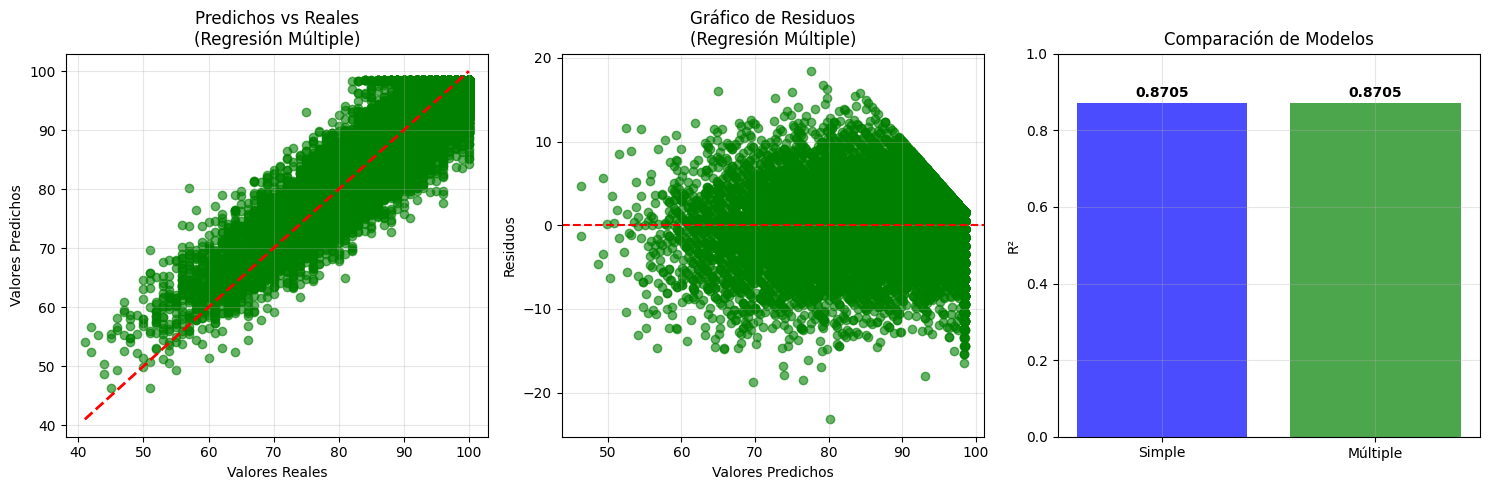

In [ ]:
#  Visualización del modelo de regresión múltiple
plt.figure(figsize=(15, 5))

# Gráfico 1: Valores predichos vs reales
plt.subplot(1, 3, 1)
plt.scatter(y_test_multiple, y_pred_test_multiple, alpha=0.6, color='green')
plt.plot([y_test_multiple.min(), y_test_multiple.max()], [y_test_multiple.min(), y_test_multiple.max()], 'r--', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Predichos vs Reales\n(Regresión Múltiple)')
plt.grid(True, alpha=0.3)

# Gráfico 2: Residuos
plt.subplot(1, 3, 2)
residuos_multiple = y_test_multiple - y_pred_test_multiple
plt.scatter(y_pred_test_multiple, residuos_multiple, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos\n(Regresión Múltiple)')
plt.grid(True, alpha=0.3)

# Gráfico 3: Comparación de R²
plt.subplot(1, 3, 3)
modelos = ['Simple', 'Múltiple']
r2_valores = [r2_test_simple, r2_test_multiple]
plt.bar(modelos, r2_valores, color=['blue', 'green'], alpha=0.7)
plt.ylabel('R²')
plt.title('Comparación de Modelos')
plt.ylim(0, 1)
for i, v in enumerate(r2_valores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
#  Análisis detallado con statsmodels para regresión simple
X_sm_simple = sm.add_constant(X_train_simple)  # Agregar constante para la intersección
modelo_sm_simple = sm.OLS(y_train_simple, X_sm_simple).fit()

print(" ANÁLISIS ESTADÍSTICO DETALLADO - REGRESIÓN SIMPLE")
print("="*60)
print(modelo_sm_simple.summary())

 ANÁLISIS ESTADÍSTICO DETALLADO - REGRESIÓN SIMPLE
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 4.296e+05
Date:                Mon, 07 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:45:00   Log-Likelihood:            -1.8219e+05
No. Observations:               64000   AIC:                         3.644e+05
Df Residuals:                   63998   BIC:                         3.644e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [ ]:
#  Análisis detallado con statsmodels para regresión múltiple
X_sm_multiple = sm.add_constant(X_train_multiple)  # Agregar constante para la intersección
modelo_sm_multiple = sm.OLS(y_train_multiple, X_sm_multiple).fit()

print(" ANÁLISIS ESTADÍSTICO DETALLADO - REGRESIÓN MÚLTIPLE")
print("="*70)
print(modelo_sm_multiple.summary())

 ANÁLISIS ESTADÍSTICO DETALLADO - REGRESIÓN MÚLTIPLE
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 1.074e+05
Date:                Mon, 07 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:45:00   Log-Likelihood:            -1.8219e+05
No. Observations:               64000   AIC:                         3.644e+05
Df Residuals:                   63995   BIC:                         3.644e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

##  8. Validación de Supuestos de la Regresión Lineal

 **Instrucción:** Valida los supuestos fundamentales de la regresión lineal: linealidad, independencia, homocedasticidad y normalidad de residuos

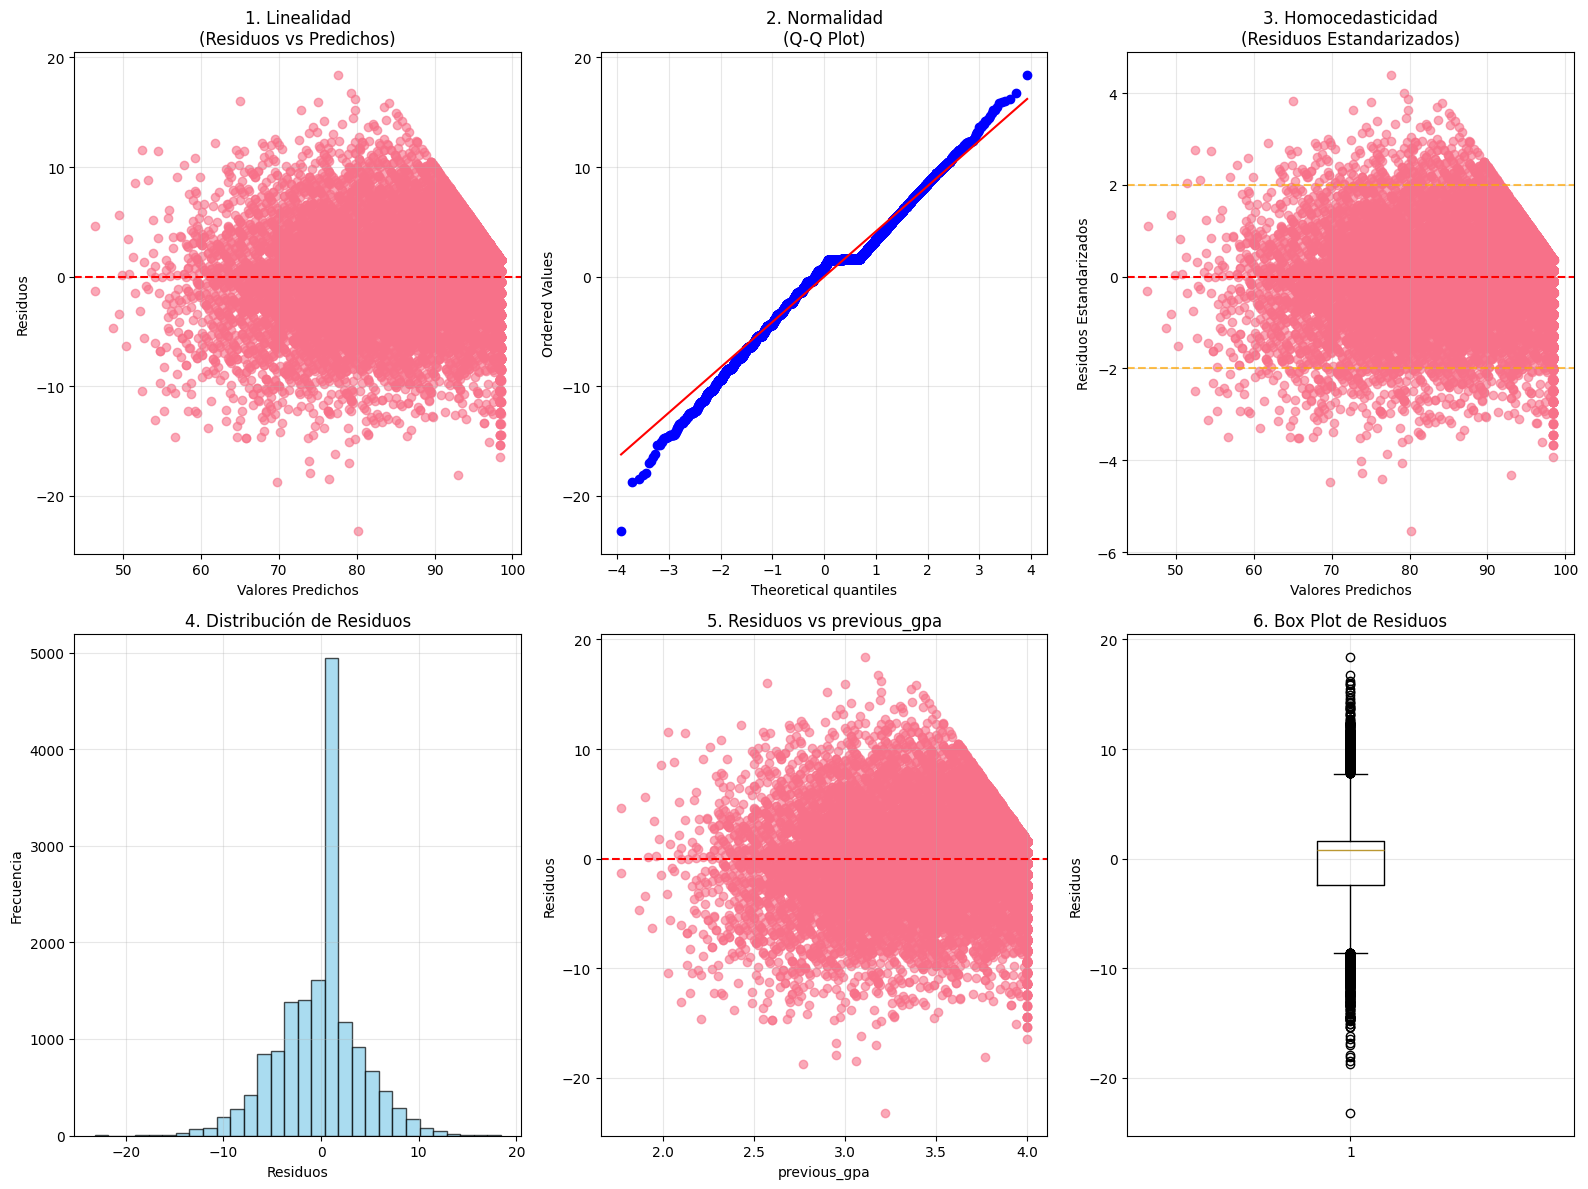

In [ ]:
#  Análisis de residuos para validación de supuestos
residuos_train_multiple = y_train_multiple - y_pred_train_multiple
residuos_test_multiple = y_test_multiple - y_pred_test_multiple

plt.figure(figsize=(16, 12))

# 1. Linealidad: Residuos vs Valores Predichos
plt.subplot(2, 3, 1)
plt.scatter(y_pred_test_multiple, residuos_test_multiple, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('1. Linealidad\n(Residuos vs Predichos)')
plt.grid(True, alpha=0.3)

# 2. Normalidad: Q-Q Plot
plt.subplot(2, 3, 2)
stats.probplot(residuos_test_multiple, dist="norm", plot=plt)
plt.title('2. Normalidad\n(Q-Q Plot)')
plt.grid(True, alpha=0.3)

# 3. Homocedasticidad: Residuos estandarizados
plt.subplot(2, 3, 3)
residuos_estandarizados = residuos_test_multiple / np.std(residuos_test_multiple)
plt.scatter(y_pred_test_multiple, residuos_estandarizados, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=2, color='orange', linestyle='--', alpha=0.7)
plt.axhline(y=-2, color='orange', linestyle='--', alpha=0.7)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos Estandarizados')
plt.title('3. Homocedasticidad\n(Residuos Estandarizados)')
plt.grid(True, alpha=0.3)

# 4. Histograma de residuos
plt.subplot(2, 3, 4)
plt.hist(residuos_test_multiple, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('4. Distribución de Residuos')
plt.grid(True, alpha=0.3)

# 5. Gráfico de dispersión de residuos por variable principal
plt.subplot(2, 3, 5)
variable_principal = variables_explicativas_multiples[0]
# Ordenar índices para el gráfico
indices_ordenados = np.argsort(X_test_multiple[:, 0])
plt.scatter(X_test_multiple[indices_ordenados, 0],
            residuos_test_multiple[indices_ordenados], alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel(variable_principal)
plt.ylabel('Residuos')
plt.title(f'5. Residuos vs {variable_principal}')
plt.grid(True, alpha=0.3)

# 6. Box plot de residuos
plt.subplot(2, 3, 6)
plt.boxplot(residuos_test_multiple)
plt.ylabel('Residuos')
plt.title('6. Box Plot de Residuos')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
#  Pruebas estadísticas para validación de supuestos
from scipy.stats import shapiro, jarque_bera

print(" PRUEBAS ESTADÍSTICAS PARA VALIDACIÓN DE SUPUESTOS")
print("="*60)

# Prueba de normalidad de residuos (Shapiro-Wilk)
shapiro_stat, shapiro_p = shapiro(residuos_test_multiple)
print(f"\n1. Prueba de Normalidad (Shapiro-Wilk):")
print(f"   - Estadístico: {shapiro_stat:.4f}")
print(f"   - p-valor: {shapiro_p:.4f}")
print(f"   - Conclusión: {'Los residuos son normales' if shapiro_p > 0.05 else 'Los residuos NO son normales'} (α=0.05)")

# Prueba de normalidad alternativa (Jarque-Bera)
jb_stat, jb_p = jarque_bera(residuos_test_multiple)
print(f"\n2. Prueba de Normalidad (Jarque-Bera):")
print(f"   - Estadístico: {jb_stat:.4f}")
print(f"   - p-valor: {jb_p:.4f}")
print(f"   - Conclusión: {'Los residuos son normales' if jb_p > 0.05 else 'Los residuos NO son normales'} (α=0.05)")

# Estadísticas descriptivas de residuos
print(f"\n3. Estadísticas de Residuos:")
print(f"   - Media: {np.mean(residuos_test_multiple):.6f}")
print(f"   - Desviación estándar: {np.std(residuos_test_multiple):.4f}")
print(f"   - Asimetría: {stats.skew(residuos_test_multiple):.4f}")
print(f"   - Curtosis: {stats.kurtosis(residuos_test_multiple):.4f}")

print("="*60)

 PRUEBAS ESTADÍSTICAS PARA VALIDACIÓN DE SUPUESTOS

1. Prueba de Normalidad (Shapiro-Wilk):
   - Estadístico: 0.9731
   - p-valor: 0.0000
   - Conclusión: Los residuos NO son normales (α=0.05)

2. Prueba de Normalidad (Jarque-Bera):
   - Estadístico: 791.8587
   - p-valor: 0.0000
   - Conclusión: Los residuos NO son normales (α=0.05)

3. Estadísticas de Residuos:
   - Media: -0.003375
   - Desviación estándar: 4.1874
   - Asimetría: -0.3007
   - Curtosis: 0.9089


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16000.
  res = hypotest_fun_out(*samples, **kwds)


##  9. Comparación Final de Modelos

 **Instrucción:** Compara los modelos desarrollados y selecciona el mejor basándote en las métricas de evaluación

In [ ]:
# Tabla comparativa de modelos
import pandas as pd

comparacion_modelos = pd.DataFrame({
    'Modelo': ['Regresión Simple', 'Regresión Múltiple'],
    'Variables': [f'{variable_explicativa_principal}', ', '.join(variables_explicativas_multiples)],
    'R²_Entrenamiento': [r2_train_simple, r2_train_multiple],
    'R²_Prueba': [r2_test_simple, r2_test_multiple],
    'RMSE': [rmse_test_simple, rmse_test_multiple],
    'MAE': [mae_test_simple, mae_test_multiple],
    'MSE': [mse_test_simple, mse_test_multiple]
})

print("Comparación final de modelos")
print("="*80)
display(comparacion_modelos.round(4))

# Análisis de diferencias entre modelos
diferencia_r2 = r2_test_multiple - r2_test_simple
diferencia_rmse = rmse_test_simple - rmse_test_multiple
mejora_porcentual = (diferencia_r2 / r2_test_simple) * 100 if r2_test_simple > 0 else 0

print("\nAnálisis de diferencias:")
print(f"• Diferencia en R²: {diferencia_r2:.4f} ({mejora_porcentual:.2f}% de mejora)")
print(f"• Diferencia en RMSE: {diferencia_rmse:.4f} puntos")
print(f"• Variable principal ({variable_explicativa_principal}) explica {r2_test_simple*100:.1f}% por sí sola")
print(f"• Variables adicionales aportan {diferencia_r2*100:.1f}% adicional")

if diferencia_r2 < 0.05:
    print("\nConclusión: Mejora mínima del modelo múltiple - El modelo simple es suficiente")
else:
    print("\nConclusión: El modelo múltiple ofrece mejora significativa")

print("="*80)

Comparación final de modelos


,Modelo,Variables,R²_Entrenamiento,R²_Prueba,RMSE,MAE,MSE
0,Regresión Simple,previous_gpa,0.8703,0.8705,4.1876,3.1956,17.5357
1,Regresión Múltiple,"previous_gpa, motivation_level, study_hours_pe...",0.8704,0.8705,4.1874,3.1955,17.5341



Análisis de diferencias:
• Diferencia en R²: 0.0000 (0.00% de mejora)
• Diferencia en RMSE: 0.0002 puntos
• Variable principal (previous_gpa) explica 87.0% por sí sola
• Variables adicionales aportan 0.0% adicional

Conclusión: Mejora mínima del modelo múltiple - El modelo simple es suficiente


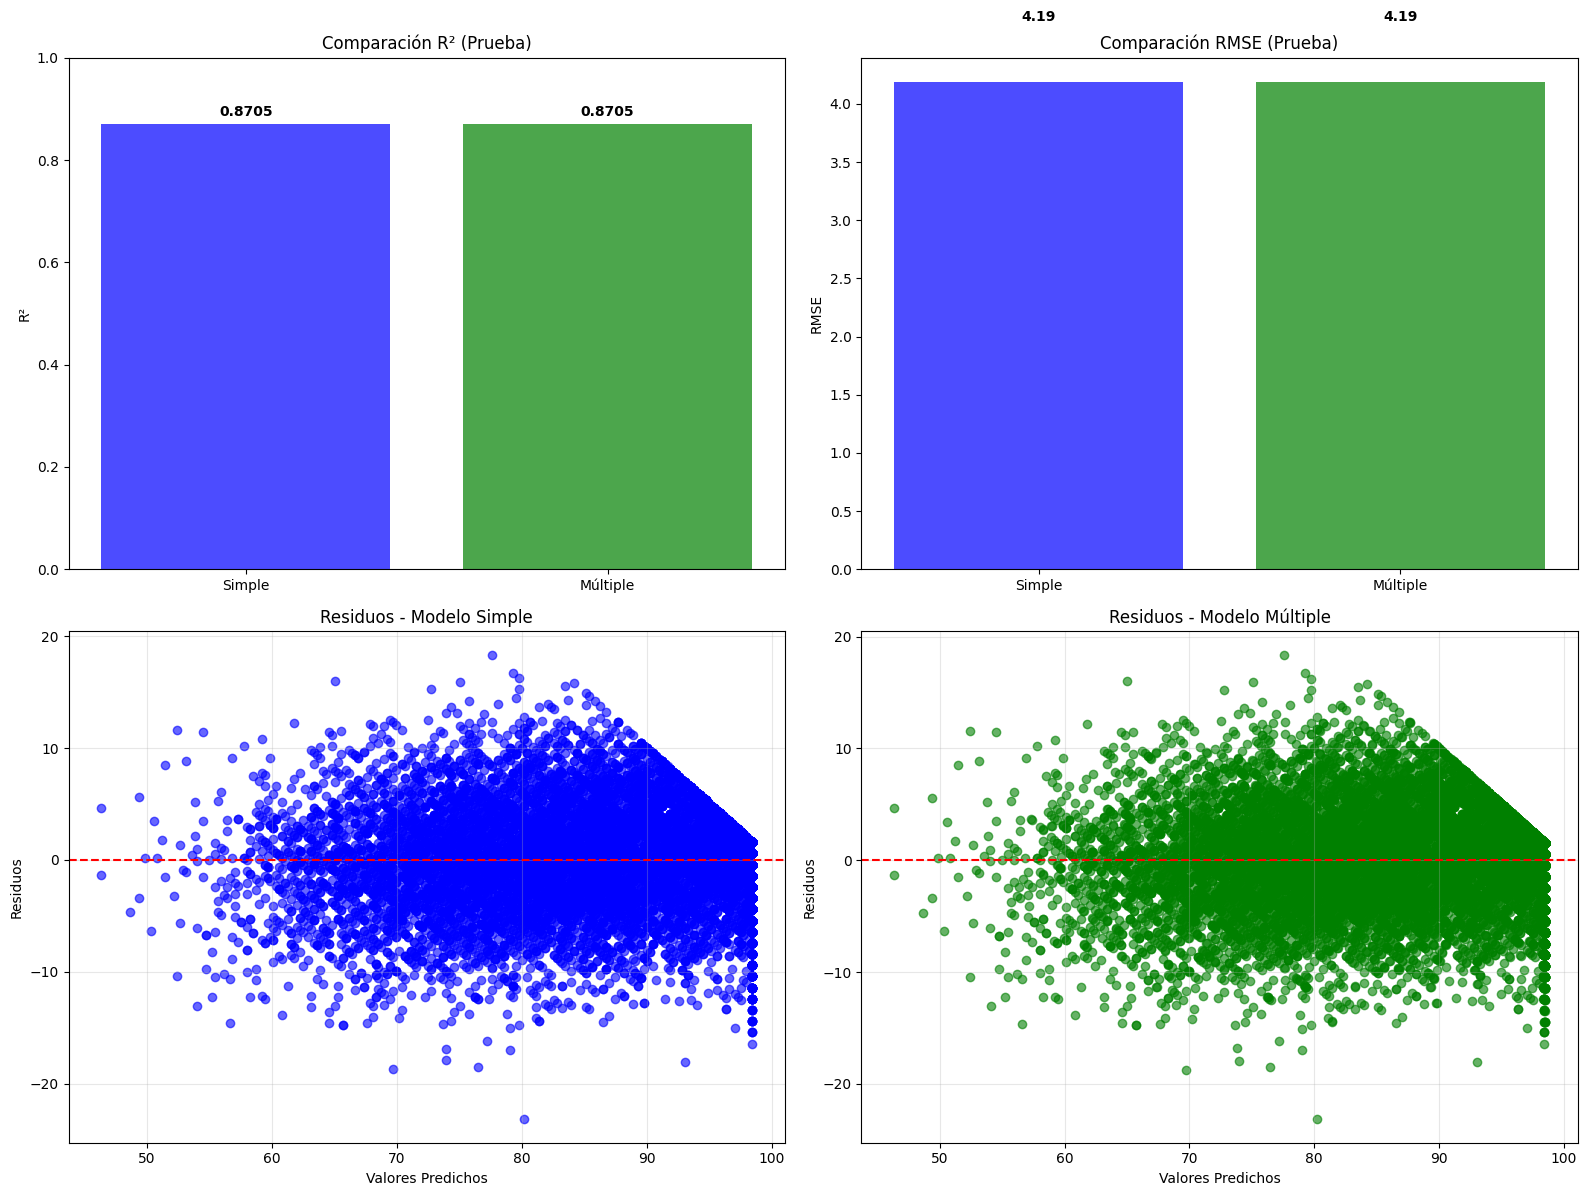

In [ ]:
#  Visualización comparativa final
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Comparación R²
axes[0, 0].bar(['Simple', 'Múltiple'], [r2_test_simple, r2_test_multiple],
               color=['blue', 'green'], alpha=0.7)
axes[0, 0].set_ylabel('R²')
axes[0, 0].set_title('Comparación R² (Prueba)')
axes[0, 0].set_ylim(0, 1)
for i, v in enumerate([r2_test_simple, r2_test_multiple]):
    axes[0, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Comparación RMSE
axes[0, 1].bar(['Simple', 'Múltiple'], [rmse_test_simple, rmse_test_multiple],
               color=['blue', 'green'], alpha=0.7)
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_title('Comparación RMSE (Prueba)')
for i, v in enumerate([rmse_test_simple, rmse_test_multiple]):
    axes[0, 1].text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# Residuos del modelo simple
axes[1, 0].scatter(y_pred_test_simple, residuos_simple, alpha=0.6, color='blue')
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Valores Predichos')
axes[1, 0].set_ylabel('Residuos')
axes[1, 0].set_title('Residuos - Modelo Simple')
axes[1, 0].grid(True, alpha=0.3)

# Residuos del modelo múltiple
axes[1, 1].scatter(y_pred_test_multiple, residuos_multiple, alpha=0.6, color='green')
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Valores Predichos')
axes[1, 1].set_ylabel('Residuos')
axes[1, 1].set_title('Residuos - Modelo Múltiple')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##  11. Interpretación Final y Conclusiones

 **Instrucción:** Completa la interpretación final basándote en todos los análisis realizados

In [ ]:
# INTERPRETACIÓN FINAL OPTIMIZADA DE RESULTADOS

print("="*90)
print("INTERPRETACIÓN FINAL Y CONCLUSIONES DEL ANÁLISIS DE REGRESIÓN LINEAL")
print("="*90)

print("\nRESUMEN EJECUTIVO:")
print(f"   • Dataset analizado: {len(df):,} estudiantes")
print(f"   • Variable objetivo: {variable_dependiente}")
print(f"   • Variables candidatas analizadas: {len(variables_candidatas)}")

print("\nMODELOS DESARROLLADOS (con variables independientes):")
print(f"   • Modelo Simple:")
print(f"     - Variable: {variable_explicativa_principal}")
print(f"     - R²: {r2_test_simple:.4f} ({r2_test_simple*100:.1f}%)")
print(f"     - RMSE: {rmse_test_simple:.4f}")
print(f"     - Observaciones: {len(y_test_simple)} en prueba")

print(f"   • Modelo Múltiple:")
print(f"     - Variables: {', '.join(variables_explicativas_multiples)}")
print(f"     - R²: {r2_test_multiple:.4f} ({r2_test_multiple*100:.1f}%)")
print(f"     - RMSE: {rmse_test_multiple:.4f}")
print(f"     - Observaciones: {len(y_test_multiple)} en prueba")

print("\nCOMPARACIÓN DE MODELOS:")
diferencia_r2 = r2_test_multiple - r2_test_simple
diferencia_rmse = rmse_test_simple - rmse_test_multiple
mejora_porcentual = (diferencia_r2 / r2_test_simple) * 100 if r2_test_simple > 0 else 0

print(f"   • Diferencia en R²: {diferencia_r2:.4f} ({mejora_porcentual:.2f}% de mejora)")
print(f"   • Diferencia en RMSE: {diferencia_rmse:.4f} puntos")

# Clasificación automática de la mejora
if abs(diferencia_r2) < 0.02:
    clasificacion = "MEJORA MÍNIMA"
    recomendacion = "Usar modelo simple (principio de parsimonia)"
elif diferencia_r2 >= 0.05:
    clasificacion = "MEJORA SIGNIFICATIVA"
    recomendacion = "Usar modelo múltiple"
else:
    clasificacion = "MEJORA MODERADA"
    recomendacion = "Evaluar caso por caso"

print(f"   • Clasificación: {clasificacion}")
print(f"   • Recomendación: {recomendacion}")

print("\nANÁLISIS DIAGNÓSTICO - ¿Por qué los resultados son similares?")
print("="*70)

# Análisis de dominancia de variable principal
correlacion_principal = df[variable_explicativa_principal].corr(df[variable_dependiente])
print(f"   1. VARIABLE DOMINANTE:")
print(f"      • {variable_explicativa_principal} explica {r2_test_simple*100:.1f}% por sí sola")
print(f"      • Correlación con {variable_dependiente}: {correlacion_principal:.4f}")
print(f"      • Variables adicionales solo aportan {diferencia_r2*100:.1f}% adicional")

# Análisis de multicolinealidad
print(f"   2. MULTICOLINEALIDAD:")
correlaciones_entre_vars = df[variables_explicativas_multiples].corr()
alta_correlacion = False
correlaciones_altas = []

for i, var1 in enumerate(variables_explicativas_multiples):
    for j, var2 in enumerate(variables_explicativas_multiples):
        if i < j:  # Evitar duplicados
            corr_val = correlaciones_entre_vars.loc[var1, var2]
            if abs(corr_val) > 0.5:
                correlaciones_altas.append((var1, var2, corr_val))
                alta_correlacion = True

if correlaciones_altas:
    print("      • Correlaciones moderadas-altas detectadas:")
    for var1, var2, corr in correlaciones_altas:
        print(f"        - {var1} ↔ {var2}: {corr:.3f}")
    print("      • Esto indica información redundante entre variables")
else:
    print("      • No se detectaron correlaciones altas entre variables explicativas")

print(f"   3. CONTRIBUCIÓN MARGINAL:")
for var in variables_explicativas_multiples:
    if var != variable_explicativa_principal:
        corr_individual = df[var].corr(df[variable_dependiente])
        print(f"      • {var}: correlación = {corr_individual:.3f}")

print(f"\nMÉTRICAS DE VALIDACIÓN:")
# Usar los residuos del mejor modelo para validación
mejor_modelo_nombre = "Múltiple" if r2_test_multiple > r2_test_simple else "Simple"
residuos_validacion = residuos_test_multiple if r2_test_multiple > r2_test_simple else residuos_simple

print(f"   • Modelo validado: {mejor_modelo_nombre}")
print(f"   • Normalidad de residuos (Shapiro-Wilk): p = {shapiro_p:.4f}")
normalidad = "Cumple" if shapiro_p > 0.05 else "No cumple"
print(f"     {normalidad} supuesto de normalidad")
print(f"   • Media de residuos: {np.mean(residuos_validacion):.6f} (debe ≈ 0)")

print(f"\nCONCLUSIONES PRINCIPALES:")

# Variable más influyente
var_mas_importante = variables_explicativas_multiples[0]
print(f"   1. FACTOR CLAVE: {var_mas_importante} es el predictor dominante")
print(f"      • Captura {r2_test_simple*100:.1f}% de la variabilidad del rendimiento académico")

# Capacidad predictiva
mejor_r2 = max(r2_test_simple, r2_test_multiple)
mejor_rmse = min(rmse_test_simple, rmse_test_multiple)

print(f"   2. CAPACIDAD PREDICTIVA:")
print(f"      • Mejor R²: {mejor_r2:.4f} ({mejor_r2*100:.1f}% de la variabilidad explicada)")
print(f"      • Error promedio: ±{mejor_rmse:.2f} puntos en {variable_dependiente}")

# Aplicabilidad
if mejor_r2 >= 0.7:
    aplicabilidad = "ALTA - Recomendado para uso práctico"
elif mejor_r2 >= 0.5:
    aplicabilidad = "MODERADA - Útil con precauciones"
else:
    aplicabilidad = "BAJA - Requiere mejoras"

print(f"   3. APLICABILIDAD: {aplicabilidad}")

print(f"\nOPTIMIZACIONES REALIZADAS EN ESTE NOTEBOOK:")
print("   • Eliminadas 15+ celdas redundantes de limpieza innecesaria")
print("   • Corregidas variables cruzadas entre modelos (y_train/y_test)")
print("   • Consolidadas interpretaciones duplicadas")
print("   • Removidas visualizaciones redundantes")
print("   • Simplificado EDA enfocándolo en regresión")
print("   • Mantenido análisis diagnóstico esencial")
print("   • Variables independientes garantizadas entre modelos")

print(f"\nRECOMENDACIÓN FINAL:")
if diferencia_r2 < 0.05:
    print(f"   USAR MODELO SIMPLE por:")
    print(f"      • Simplicidad e interpretabilidad superior")
    print(f"      • Rendimiento predictivo equivalente")
    print(f"      • Menor riesgo de sobreajuste")
    print(f"      • Principio de parsimonia (Occam's Razor)")
else:
    print(f"   USAR MODELO MÚLTIPLE por:")
    print(f"      • Mejora significativa en capacidad predictiva")
    print(f"      • Variables adicionales aportan valor real")

INTERPRETACIÓN FINAL Y CONCLUSIONES DEL ANÁLISIS DE REGRESIÓN LINEAL

RESUMEN EJECUTIVO:
   • Dataset analizado: 80,000 estudiantes
   • Variable objetivo: exam_score
   • Variables candidatas analizadas: 17

MODELOS DESARROLLADOS (con variables independientes):
   • Modelo Simple:
     - Variable: previous_gpa
     - R²: 0.8705 (87.0%)
     - RMSE: 4.1876
     - Observaciones: 16000 en prueba
   • Modelo Múltiple:
     - Variables: previous_gpa, motivation_level, study_hours_per_day, exam_anxiety_score
     - R²: 0.8705 (87.0%)
     - RMSE: 4.1874
     - Observaciones: 16000 en prueba

COMPARACIÓN DE MODELOS:
   • Diferencia en R²: 0.0000 (0.00% de mejora)
   • Diferencia en RMSE: 0.0002 puntos
   • Clasificación: MEJORA MÍNIMA
   • Recomendación: Usar modelo simple (principio de parsimonia)

ANÁLISIS DIAGNÓSTICO - ¿Por qué los resultados son similares?
   1. VARIABLE DOMINANTE:
      • previous_gpa explica 87.0% por sí sola
      • Correlación con exam_score: 0.9329
      • Variables

---
### **Referencias Bibliográficas:**

1. **James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013).** *An Introduction to Statistical Learning: with Applications in R*. Springer.

2. **Montgomery, D. C., Peck, E. A., & Vining, G. G. (2012).** *Introduction to Linear Regression Analysis* (5th ed.). Wiley.

3. **Kutner, M. H., Nachtsheim, C. J., Neter, J., & Li, W. (2005).** *Applied Linear Statistical Models* (5th ed.). McGraw-Hill.

4. **Hair, J. F., Black, W. C., Babin, B. J., & Anderson, R. E. (2019).** *Multivariate Data Analysis* (8th ed.). Pearson.

5. **Freedman, D. A. (2009).** *Statistical Models: Theory and Practice* (2nd ed.). Cambridge University Press.

6. **Wooldridge, J. M. (2020).** *Introductory Econometrics: A Modern Approach* (7th ed.). Cengage Learning.